<a href="https://colab.research.google.com/github/TranThaiAn19146304/AI_project/blob/main/robot_3dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BƯỚC 1: THÊM THƯ VIỆN BAN DẦU**

In [4]:
#một số thư viện cần thiết ban đầu
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam

In [5]:
#tạo hàm con vẽ đồ thị chất lượng
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

**BƯỚC 2: TẠO DỮ LIỆU (GHI VÀO FILE .CSV)**

In [6]:
from re import U
import matplotlib.pyplot as plt
import math
import csv
import numpy as np
u=[]
z=[]
for i in range(0,121,3):
  for j in range(0,91,3):
    for k in range (0,91,3):
      x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))+30*math.cos(math.radians(i+j+k))
      y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))+30*math.sin(math.radians(i+j+k))
      t=i+j+k
      z.append(np.array((i,j,k,x,y,t)))
  u.extend(z)

In [7]:
header = ['anpha', 'beta','delta', 'x', 'y','phi']
with open('robot_3dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(u)

**BƯỚC 3: XỬ LÍ DỮ LIỆU**

In [ ]:
data = pd.read_csv('robot_3dof.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

**BƯỚC 4:TẠO MODEL**

In [10]:
model=Sequential()
model.add(Dense(162, activation='relu', input_shape = (3,))) 
model.add(Dense(54, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(3,  activation='linear'))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 162)               648       
                                                                 
 dense_11 (Dense)            (None, 54)                8802      
                                                                 
 dense_12 (Dense)            (None, 27)                1485      
                                                                 
 dense_13 (Dense)            (None, 9)                 252       
                                                                 
 dense_14 (Dense)            (None, 3)                 30        
                                                                 
Total params: 11,217
Trainable params: 11,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16549/16549 [==========================

**BƯỚC 5: KIỂM TRA CHẤT LƯỢNG**

sai so kiem tra la 7.730702877044678
do chinh xac kiem tra 0.9610115885734558


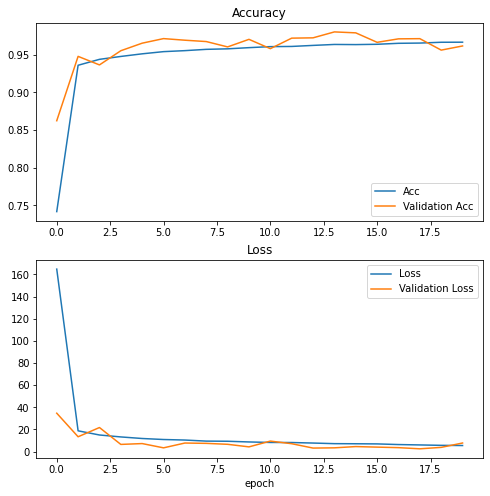

In [11]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])
plot_history(history)

**BƯỚC 6: DỰ ĐOÁN**

In [17]:
px = float(input("nhập px : "))
py = float(input("nhập py : "))
fi = float(input("nhập fi : "))
test = model.predict([[px,py,fi]])
t1 = test[0][0]
t2 = test[0][1]
t3 = test[0][2]
x=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))+30*math.cos(math.radians(t1+t2+t3))
y=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))+30*math.sin(math.radians(t1+t2+t3))
print("Dự đoán : " + "t1: " + str(t1) + ", " + "t2: " + str(t2) + "t3: " + str(t3))
print("Dự đoán : " + "px: " + str(x) + ", " + "py: " + str(y))

nhập px : 60
nhập py : 70
nhập fi : 90
Dự đoán : t1: 1.1734734, t2: 74.48025t3: 13.823021
Dự đoán : px: 60.17475688749847, py: 69.77536170578604


**BƯỚC 7: LƯU MODEL**

In [ ]:
model.save('Robot_3dof.h5')